In [25]:
#Structured Data - csv file for an airline's customer satisfactiona and demographic data
#begin importing my csv into python for analysis
import csv

#assign my cvs name to a variable for the csv reader function
infile = 'Satisfaction_Survey.csv'

# create new empty list
surveyList = []

with open(infile, 'r') as csvfile:

    # use csv file reader to returns a list of csv items on each line
    surveyReader = csv.reader(csvfile,  dialect='excel', delimiter=',')

    # from each line, put each item in a dictionary with a key
    for line in surveyReader:

      # skip beginning line
      if line[0].startswith('Satisfaction'):            
         continue
      else:

          # create a dictionary for each line
          survey = {}

          # add each piece of data under a key representing that column data and clean up my data using .replace function
          survey['satisfaction'] = float(line[0])
          survey['status'] = line[1]
          survey['age'] = int(line[2])
          survey['gender'] = line[3]
          survey['price_sensitive'] = int(line[4])
          survey['flight_year'] = int(line[5])
          survey['flight_number'] = int(line[6])
          survey['flight_percent'] = int(line[7])
          survey['travel_type'] = line[8]
          survey['loyalty_cards'] = int(line[9])
          survey['shopping_amount'] = int(line[10])
          survey['eating'] = int(line[11])
          survey['class'] = line[12]
          survey['day'] = int(line[13])
          survey['date'] = line[14]
          survey['code'] = line[15]
          survey['airline_name'] = line[16]
          survey['orgin_city'] = line[17].replace(',','')
          survey['orgin_state'] = line[18]
          survey['destination_city'] = line[19].replace(',','')
          survey['destination_state'] = line[20]
          survey['departure_hour'] = int(line[21])
          survey['departure_minute'] = int(line[22].replace('','0'))
          survey['arrival_delay'] = int(line[23].replace('','0'))
          survey['flight_cancelled'] = line[24]
          survey['flight_minutes'] = int(line[25].replace('','0'))
          survey['flight_distance'] = int(line[26])
          survey['arrival_delay_great'] = line[27]  
          survey['arrival_delay'] = int(line[23].replace('','0'))
          survey['flight_cancelled'] = line[24]
          survey['flight_minutes_again'] = int(line[25].replace('','0'))
          survey['flight_distance_again'] = int(line[26])
          survey['arrival_delay_great'] = line[27]  

          # add these dictionaries to the list
          surveyList.append(survey)

#close file    
csvfile.close()




In [20]:
#import pandas and bring my processed data into pandas data frame
import pandas as pd
df = pd.DataFrame(surveyList)
df

,satisfaction,status,age,gender,price_sensitive,flight_year,flight_number,flight_percent,travel_type,loyalty_cards,...,destination_state,departure_hour,departure_minute,arrival_delay,flight_cancelled,flight_minutes,flight_distance,arrival_delay_great,flight_minutes_again,flight_distance_again
0,4.5,Blue,31,Male,1,2007,28,7,Business travel,2,...,Texas,15,0,30,No,103040,821,no,103040,821
1,4.0,Blue,56,Male,2,2006,41,3,Business travel,0,...,Texas,11,20,50,No,102000,821,no,102000,821
2,2.5,Blue,21,Female,2,2006,8,7,Personal Travel,0,...,Texas,12,3040,1040,No,102020,853,yes,102020,853
3,4.0,Blue,43,Male,1,2007,9,9,Business travel,2,...,Texas,11,2060,3090,No,104010,821,yes,104010,821
4,5.0,Silver,49,Male,1,2006,14,10,Business travel,0,...,Texas,12,0,0,No,104040,853,no,104040,853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129884,2.0,Blue,85,Female,1,2011,29,4,Personal Travel,0,...,California,19,20,30,No,6090,447,no,6090,447
129885,2.0,Blue,16,Female,1,2011,14,7,Personal Travel,2,...,California,14,0,0,No,5030,308,no,5030,308
129886,2.0,Blue,78,Female,1,2003,19,5,Personal Travel,0,...,California,7,60,1040,No,7020,337,yes,7020,337
129887,4.0,Gold,48,Male,1,2006,10,8,Personal Travel,0,...,California,9,3010,2020,No,5060,337,yes,5060,337


In [3]:
#filter satisfaction scores by each status for analysis
blue = df[df["status"] == 'Blue'].satisfaction
silver = df[df["status"] == 'Silver'].satisfaction
gold = df[df["status"] == 'Gold'].satisfaction
platinum = df[df["status"] == 'Platinum'].satisfaction

status = pd.DataFrame({'blue': blue, 'silver': silver, 'gold': gold, 'platinum': platinum})

#run the pandas describe function to find mean and spread for each status's overall satisfaction
status.describe()

,blue,silver,gold,platinum
count,88910.000000,25970.000000,10837.000000,4172.000000
mean,3.158145,3.942461,3.743794,3.644056
std,0.923621,0.652171,1.036742,1.385303
min,1.000000,3.000000,2.000000,1.000000
25%,2.000000,4.000000,3.000000,2.000000
50%,3.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [4]:
#more specific filter to analyze each status and separate satisfaction by gender, as well.
bluem = df[(df["status"] == 'Blue') & (df['gender']=='Male')].satisfaction
bluef = df[(df["status"] == 'Blue') & (df['gender']=='Female')].satisfaction

silverm = df[(df["status"] == 'Silver') & (df['gender']=='Male')].satisfaction
silverf = df[(df["status"] == 'Silver') & (df['gender']=='Female')].satisfaction

goldm = df[(df["status"] == 'Gold') & (df['gender']=='Male')].satisfaction
goldf = df[(df["status"] == 'Gold') & (df['gender']=='Female')].satisfaction

platm = df[(df["status"] == 'Platinum') & (df['gender']=='Male')].satisfaction
platf = df[(df["status"] == 'Platinum') & (df['gender']=='Female')].satisfaction

#create pandas for each status and gender within each status to analyze with pandas describe function.
status_gender = pd.DataFrame({'blue_m':bluem, 'blue_f':bluef,'silver_m':silverm, 'silver_f':silverf,'gold_m':goldm, 'gold_f':goldf,'plat_m':platm, 'plat_f':platf, })
status_gender.describe()

,blue_m,blue_f,silver_m,silver_f,gold_m,gold_f,plat_m,plat_f
count,37903.000000,51007.000000,11501.000000,14469.000000,4543.000000,6294.000000,2568.000000,1604.000000
mean,3.305060,3.048974,4.075689,3.836561,3.906339,3.626470,3.637461,3.654613
std,0.945243,0.891687,0.685144,0.604136,1.074647,0.992169,1.424844,1.319903
min,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000
25%,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
import datetime

#start to analyze data on flight dates:
#use datetime function to_datetime to convert my dates into an easier format to assign weekday values 
df['dates'] = pd.to_datetime(df.date)
#use dt.dayofweek to convert my dates into weekday values 0=monday, 6=sunday
df['weekday'] = pd.to_datetime(df["date"]).dt.dayofweek

#pandas filter on my new weekday variable to analyze satisfaction data between weekdays
mon = df[df["weekday"] == 0].satisfaction
tue = df[df["weekday"] == 1].satisfaction
wed = df[df["weekday"] == 2].satisfaction
thu = df[df["weekday"] == 3].satisfaction
fri = df[df["weekday"] == 4].satisfaction
sat = df[df["weekday"] == 5].satisfaction
sun = df[df["weekday"] == 6].satisfaction

#brought each day into a single dataframe to analyze with describe function
weekday_data = pd.DataFrame({'mon':mon, 'tue':tue,'wed':wed,'thu':thu,'fri':fri,'sat':sat,'sun':sun})
weekday_data.describe()


,mon,tue,wed,thu,fri,sat,sun
count,19760.000000,17224.000000,18966.000000,19592.000000,19938.000000,15839.000000,18570.000000
mean,3.390562,3.404232,3.378119,3.362699,3.365633,3.383073,3.375283
std,0.963111,0.948441,0.968601,0.971472,0.966576,0.968436,0.963932
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
#first calculated mean age so I could perform an analysis between older and younger members
print(df['age'].mean())

#after I knew the mean, I created new older and younger variables to filter and analyze beside a member's status
blueo = df[(df["status"] == 'Blue') & (df['age']>46)].satisfaction
bluey = df[(df["status"] == 'Blue') & (df['age']<46)].satisfaction

silvero = df[(df["status"] == 'Silver') & (df['age']>46)].satisfaction
silvery = df[(df["status"] == 'Silver') & (df['age']<46)].satisfaction

goldo = df[(df["status"] == 'Gold') & (df['age']>46)].satisfaction
goldy = df[(df["status"] == 'Gold') & (df['age']<46)].satisfaction

plato = df[(df["status"] == 'Platinum') & (df['age']>46)].satisfaction
platy = df[(df["status"] == 'Platinum') & (df['age']<46)].satisfaction

#after I filtered younger and older members into their proper variables, I made a pandas dataframe of all the status_gender variables to analyze
status_age = pd.DataFrame({'blue_older': blueo, 'blue_younger': bluey, 'silver_older': silvero, 'silver_younger': silvery, 'gold_older': goldo, 'gold_younger': goldy, 'platinum_older': plato, 'platinum_younger': platy})
status_age.describe()

46.196221389032175


,blue_older,blue_younger,silver_older,silver_younger,gold_older,gold_younger,platinum_older,platinum_younger
count,41994.000000,45288.000000,10591.000000,14757.000000,5494.000000,5088.000000,2288.000000,1777.000000
mean,2.963233,3.328778,3.844321,4.005997,3.496542,3.994399,3.341783,4.007316
std,0.953335,0.857107,0.673409,0.625415,1.097424,0.900614,1.464748,1.178090
min,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,4.000000
50%,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
#need to put all my summary statistics into variables so I can make output files
status_output = status.describe()
status_age_output = status_age.describe()
weeday_data_output = weekday_data.describe()
status_gender_output = status_gender.describe()

#create an output file to analyze my describive analyses for airline member's status, age, and gender.
# Write a report csv file 
# First create an output file name
outfile = 'structured.csv'
# open the file for writing
write = open(outfile, 'w')

# write title at top of file
write.write("Summary statistics for Airline Members\n\n")

#import my dataframes and put a title above each dataframe
write.write('\nStatus\n')
write.write(str(status_output))

write.write('\n\nStatus_Gender\n')
write.write(str(status_gender_output))

write.write('\n\nStatus_Age\n')
write.write(str(status_age_output))

write.write('\n\nWeeday\n')
write.write(str(weeday_data_output))

#close write function to finish the report
write.close()

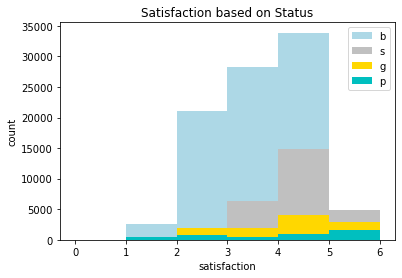

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

#created a simple histogram to visualize satisfaction counts between each status
x = blue
y = silver
z = gold
p = platinum
bins = [0,1,2,3,4,5,6]
plt.hist(x, bins, histtype='bar', color = 'lightblue')
plt.hist(y, bins, histtype='bar', color = 'silver')
plt.hist(z,bins, histtype='bar', color = 'gold')
plt.hist(p, bins, histtype='bar', color = 'c')
plt.legend('bsgp')
plt.xlabel('satisfaction')
plt.ylabel('count')
plt.title('Satisfaction based on Status')
plt.show()

#export my graph out to a png file
plt.savefig('status.png')

No handles with labels found to put in legend.


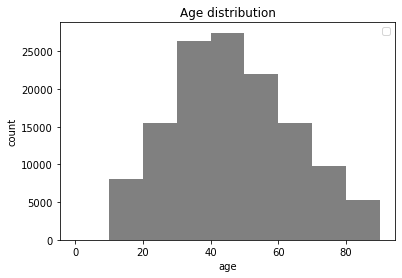

<Figure size 432x288 with 0 Axes>

In [14]:
#create simple histogram to visualize age distribution for airline members
x = df.age
bins = [0,10,20,30,40,50,60,70,80,90]
plt.hist(x, bins, histtype='bar', color = 'grey')

plt.legend()
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution')
plt.show()

#export my graph out to a png file
plt.savefig('age.png')

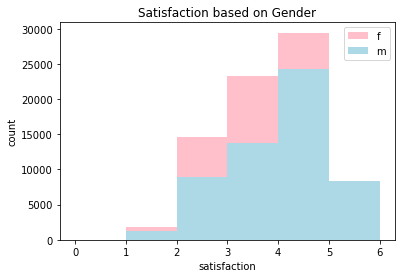

<Figure size 432x288 with 0 Axes>

In [21]:
#created variables for male and female satisfaction
m = df[df["gender"] == 'Male'].satisfaction
f = df[df["gender"] == 'Female'].satisfaction

#create histogram to show distribution of satisfaction scores between male and female members
bins = [0,1,2,3,4,5,6]
plt.hist(f, bins, histtype='bar', color = 'pink')
plt.hist(m, bins, histtype='bar', color = 'lightblue')

plt.legend('fm')
plt.xlabel('satisfaction')
plt.ylabel('count')
plt.title('Satisfaction based on Gender')
plt.show()

#export my graph out to a png file
plt.savefig('gender_scores.png')

In [26]:
#Semi-structured: Analysis on Tweets for manufacturers and airlines

#utilized the twitter_login_fn file and have it listed below:
#I needed this file to be authorized with using twitter data. 
import tweepy

#my twitter authorization codes
CONSUMER_KEY = 'RwZjr5ENhtGELDQxmCloMuiSc'
CONSUMER_SECRET = 'du8tBpftJOuD8TcXR7JBTS17RsrXHPKqWIVq00cGZBvtzMbY98'
OAUTH_TOKEN = '1328784392626597890-Y6BtbeR20LWHPEdf81sRqHUjaknGzH'
OAUTH_SECRET = 'Yb4wwQpIsTLvuiggPo9TEcYece6PoicyGZBoO2iPLRXyo'

#login authorization to twitter
def oauth_login():
  #gain authorization from twitter
  auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
  auth.set_access_token(OAUTH_TOKEN,OAUTH_SECRET)
  tweepy_api = tweepy.API(auth)

  #return api from twitter
  if (not tweepy_api):
      print ("Problem Connecting to API with OAuth")

  #tweepy object to allow its function
  return tweepy_api

#authorization from twitter and saving to the tweepy I imported in
def appauth_login():
  #gain authorization
  auth = tweepy.AppAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
  #only authorization code required
  tweepy_api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

  #check for an api returned
  if (not tweepy_api):
      print ("Problem Connecting to API with AppAuth")

  #return api
  return tweepy_api
    
#test and show the connection to the api
if __name__ == '__main__':
  tweepy_api = oauth_login()
  print ("Twitter OAuthorization: ", tweepy_api)
  tweepy_api = appauth_login()
  print ("Twitter AppAuthorization: ", tweepy_api)

Twitter OAuthorization:  <tweepy.api.API object at 0x0000023D9638BFD0>
Twitter AppAuthorization:  <tweepy.api.API object at 0x0000023D96396190>


In [ ]:
#used the following program run_twitter_simple_search_save.py in future python prompt to search for tweets I wanted to analyze: 

#import functions and authorization codes to use tweepy
import tweepy
import json
import sys
from twitter_login_fn import oauth_login
from twitter_login_fn import appauth_login
from DB_fn import save_to_DB

def simple_search(api, query, max_results=20):
  #use cursor to return more than one tweet
  search_results = [status for status in tweepy.Cursor(api.search, q=query).items(max_results)]
  
  #each tweet is put into json interpreter
  tweets = [tweet._json for tweet in search_results]
  
  return tweets

#get command lines to find appropriate tweets
if __name__ == '__main__':
    #omit first element
    #omitting the script
    args = sys.argv[1:]
    if not args or len(args) < 4:
        print('usage: python twitter_simple_search.py <query> <num tweets> <DB name> <collection name>')
        sys.exit(1)
    query = args[0]
    num_tweets = int(args[1])
    DBname = args[2]
    DBcollection = args[3]

    # api = oauth_login()
    ''' if needed switch to using the appauth login to avoid rate limiting '''
    api = appauth_login()
    print ("Twitter Authorization: ", api)
    
    #twitter query access with api
    result_tweets = simple_search(api, query, max_results=num_tweets)
    print ('Number of result tweets: ', len(result_tweets))

    #save tweets into a collection
    #change collections to lowercase 
    #remove hashtags 
    DBname = DBname.lower()
    DBname = DBname.replace('#', '')
    DBname = DBname.replace(' ', '')
    DBcollection = DBcollection.lower()
    DBcollection = DBcollection.replace('#', '')
    DBcollection = DBcollection.replace(' ', '')
    
    #save the tweets into the correct database and collection
    save_to_DB(DBname, DBcollection, result_tweets)


In [ ]:
#ran this code in python prompt. This code executes the program below, searching for 300 tweets about boeing and airbus and stores it in their respective database collections

python run_twitter_simple_search_save.py "#Boeing" 300 airline boeing

#results:
#(base) C:\Users\bcow1>python run_twitter_simple_search_save.py "#Boeing" 300 airline boeing
#Twitter Authorization:  <tweepy.api.API object at 0x00000261AFA45D00>
#Number of result tweets:  300
#Saved 300 documents to DB collection airline boeing

python run_twitter_simple_search_save.py "#Airbus" 300 airline airbus

#results:
#(base) C:\Users\bcow1>python run_twitter_simple_search_save.py "#Airbus" 300 airline airbus
#Twitter Authorization:  <tweepy.api.API object at 0x000002D16BE85D00>
#Number of result tweets:  300
#Saved 300 documents to DB collection airline airbus

#ran this code in python prompt. This code executes the program below, searching for 300 tweets for each airline and put them into their respective collection for analysis
python run_twitter_simple_search_save.py "#deltaairlines" 300 airline delta

python run_twitter_simple_search_save.py "#unitedairlines" 300 airline united

python run_twitter_simple_search_save.py "#southwestairlines" 300 airline southwest


In [27]:
#import mongo functions
import pymongo

#connect to my database
client = pymongo.MongoClient('localhost', 27017)

#check my client names (my tweet collections are stored under airline)
print(client.database_names())

['admin', 'air', 'airline', 'config', 'covid', 'lax', 'local', 'mydatabase', 'peopledb', 'usgs']


<ipython-input-27-29d230fb12e3>:8: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  print(client.database_names())


In [28]:
#check my collections
db = client.airline
db.collection_names()

<ipython-input-28-fed26bea3717>:3: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


['united', 'airbus', 'southwest', 'boeing', 'delta']

In [30]:
#imports I needed for textblob to function
from textblob import TextBlob
import nltk
nltk.download('brown')

#start processing my delta tweets
airlinedata = db.delta
tweets = airlinedata.find()
tweetlist = [tweet for tweet in tweets]

#check length of 300 tweets
len(tweetlist)

#put tweet texts into empty list
doclist = []
for tweet in tweetlist:
    text = tweet['text']
    doclist.append([text])

#put polarities into an empty list
pol = []
for doc in doclist:
    text = str(doc)
    blob = TextBlob(text)
    for sentence in blob.sentences:
        pol.append(float(sentence.sentiment.polarity))

#create data frame with all my polarities
deltadf = pd.DataFrame(pol, columns=['polarity']) 

#take the mean of all polarities
print(deltadf.polarity.mean())

#created output variable to export my mean
deltadf_output = deltadf.polarity.mean()    


0.011094230851656587


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bcow1\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [31]:
#start processing my united tweets
airlinedata = db.united
tweets = airlinedata.find()
tweetlist = [tweet for tweet in tweets]

#check length of 300 tweets
len(tweetlist)

#put tweet text into empty list
doclist = []
for tweet in tweetlist:
    text = tweet['text']
    doclist.append([text])

#put polarities into empty list 
pol = []
for doc in doclist:
    text = str(doc)
    blob = TextBlob(text)
    for sentence in blob.sentences:
        pol.append(float(sentence.sentiment.polarity))

#created dataframe with all my polarities
uniteddf = pd.DataFrame(pol, columns=['polarity']) 

#found the mean polarity
print(uniteddf.polarity.mean()) 

#created output variable to export my mean
uniteddf_output = uniteddf.polarity.mean()  

0.03317585026616127


In [32]:
#start processing my southwest tweets
airlinedata = db.southwest
tweets = airlinedata.find()
tweetlist = [tweet for tweet in tweets]

#check length of 300 tweets
len(tweetlist)

#put tweet text into empty list
doclist = []
for tweet in tweetlist:
    text = tweet['text']
    doclist.append([text])

#put polarities into empty list 
pol = []
for doc in doclist:
    text = str(doc)
    blob = TextBlob(text)
    for sentence in blob.sentences:
        pol.append(float(sentence.sentiment.polarity))
  
#created dataframe with all my polarities
southwestdf = pd.DataFrame(pol, columns=['polarity']) 

#find the mean polarity of southwest tweets
print(southwestdf.polarity.mean()) 

#created output variable to export my mean
southwestdf_output = southwestdf.polarity.mean()  

0.006672958612975391


In [33]:
#start processing my boeing tweets
airlinedata = db.boeing
tweets = airlinedata.find()
tweetlist = [tweet for tweet in tweets]

#check length of 300 tweets
len(tweetlist)
    
#used mongodb compass to find out that follower, favourites, and friend count were under 'user' object
#create list for tweet from boeing 
boeinglist = []
for tweet in tweetlist:
    followers = tweet['user']['followers_count']
    favorites = tweet['user']['favourites_count']
    friends = tweet['user']['friends_count']
    boeinglist.append([followers, favorites, friends])

#entered my boeing tweet data list into pandas data frame for analysis
boeingdf = pd.DataFrame(boeinglist, columns=['Followers', 'Favorites', 'Friends'])

#use describe function to analyze my data frame
print(boeingdf.describe())

#create variable to store my boeing tweet data for output file
boeingdf_output = boeingdf.describe()

          Followers      Favorites        Friends
count  3.000000e+02     300.000000     300.000000
mean   6.530822e+04   32572.296667    2829.076667
std    3.713726e+05   80585.374473   20763.297163
min    1.000000e+00       0.000000       0.000000
25%    1.682500e+02     224.500000     153.500000
50%    1.013000e+03    2437.500000     493.500000
75%    3.893250e+03   15215.500000    2132.250000
max    5.169074e+06  355222.000000  357492.000000


In [34]:
#start processing my airbus tweets
airlinedata = db.airbus
tweets = airlinedata.find()
tweetlist = [tweet for tweet in tweets]

#check length of 300 tweets
len(tweetlist)
    
#import pandas to put my tweet data into data frame
import pandas as pd

#used mongodb compass to find out that follower, favourites, and friend count were under 'user' object
#create list for tweet for airbus 
airbuslist = []
for tweet in tweetlist:
    followers = tweet['user']['followers_count']
    favorites = tweet['user']['favourites_count']
    friends = tweet['user']['friends_count']
    airbuslist.append([followers, favorites, friends])

#entered my boeing tweet data list into pandas data frame for analysis
airbusdf = pd.DataFrame(airbuslist, columns=['Followers', 'Favorites', 'Friends'])

#use describe function to analyze my data frame
print(airbusdf.describe())

#create variable to store my boeing tweet data for output file
airbusdf_output = airbusdf.describe()

          Followers      Favorites       Friends
count  3.000000e+02     300.000000    300.000000
mean   3.598732e+04   23509.180000   1443.483333
std    3.170305e+05   58433.999419   2156.769786
min    2.000000e+00       0.000000      0.000000
25%    1.817500e+02     497.750000    168.750000
50%    7.515000e+02    4844.000000    664.000000
75%    2.789000e+03   18181.250000   1910.500000
max    5.169075e+06  576130.000000  22908.000000


In [37]:
#create an output file to analyze my describive analyses for airlines and manufacturers.
# Write a report csv file 
# First create an output file name
outfile = 'semistructured.csv'
# open the file for writing
write = open(outfile, 'w')

# write title for manufacturer data
write.write("Tweet statistics for Airline Manufacturers:\n\n")

#import my dataframes and put a title above each dataframe
write.write('\nBoeing\n')
write.write(str(boeingdf_output))

write.write('\n\nAirbus\n')
write.write(str(airbusdf_output))

#create a title for airline sentiment analysis means for each airline
write.write('\n\n\nMean Polarities for each Airline:\n\n')

write.write('\nDelta\n')
write.write(str(deltadf_output))

write.write('\n\nUnited\n')
write.write(str(uniteddf_output))

write.write('\n\nSouthwest\n')
write.write(str(southwestdf_output))

#close write function to finish the report
write.close()